In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [182]:
df = pd.read_csv('abalone.csv')

In [183]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [184]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [185]:
# Function to check if a row satisfies the constraints
def check_constraints(row):
    # Viscera weight constraint: Viscera weight must not exceed Whole weight
    if row['Viscera weight'] > row['Whole weight']:
        return -1
        
    # Length Constraint: 0.05 < Length < 1
    if row['Length'] < 0.05 or row['Length'] > 1:
        return -1

    # Diameter Constraint: 0.05 < Diameter < 1
    if row['Diameter'] < 0.05 or row['Diameter'] > 1:
        return -1

    # Height Constraint: 0 < Height < 1.5
    if row['Height'] < 0 or row['Height'] > 1.5:
        return -1

    # Whole weight Constraint: 0 < Whole weight < 3
    if row['Whole weight'] < 0 or row['Whole weight'] > 3:
        return -1

    # Shucked weight Constraint: 0 < Shucked weight < 1.6
    if row['Shucked weight'] < 0 or row['Shucked weight'] > 1.6:
        return -1

    # Viscera weight Constraint: 0 < Viscera weight < 1
    if row['Viscera weight'] < 0 or row['Viscera weight'] > 1:
        return -1

    # Shell weight Constraint: 0 < Shell weight < 1.5
    if row['Shell weight'] < 0 or row['Shell weight'] > 1.5:
        return -1

    # Measurement constraint: Measurements must be non-negative
    if row['Length'] < 0 or row['Diameter'] < 0 or row['Height'] < 0:
        return -1

    # Weightconstraint: Weights must be non-negative
    if row['Whole weight'] < 0 or row['Shucked weight'] < 0 or row['Viscera weight'] < 0 or row['Shell weight'] < 0:
        return -1

    #Ring constraint: Rings must be non-negative
    if row['Rings'] < 0:
        return -1

    # Density constraint: Density (Whole weight / Volume) should be realistic
    volume = row['Length'] * row['Diameter'] * row['Height']
    if volume > 0 and row['Whole weight'] / volume < 1:
        return -1
        
    # If all constraints are satisfied, return True
    return 1

In [186]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,valid


In [187]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 10% of the rows
df_mutated = df.copy()
num_mutations = int(0.1 * len(df))  # Mutate 10% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding large random values to 'length'
df_mutated.loc[mutation_indices, 'Length'] = np.random.uniform(-10, -15, size=num_mutations)

# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [188]:
# Print the first 20 ground truth labels
print(y_true[:20])

# Print the first 20 predicted labels
print(y_pred[:20])

[ 1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1]
0     1
1    -1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13   -1
14    1
15    1
16    1
17   -1
18    1
19    1
dtype: int64


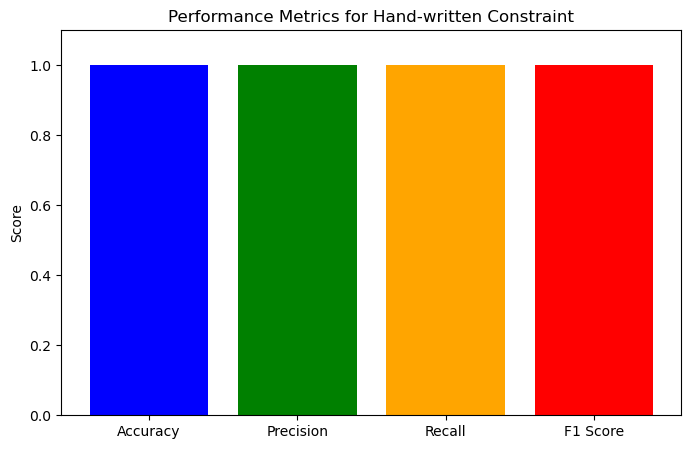

In [189]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


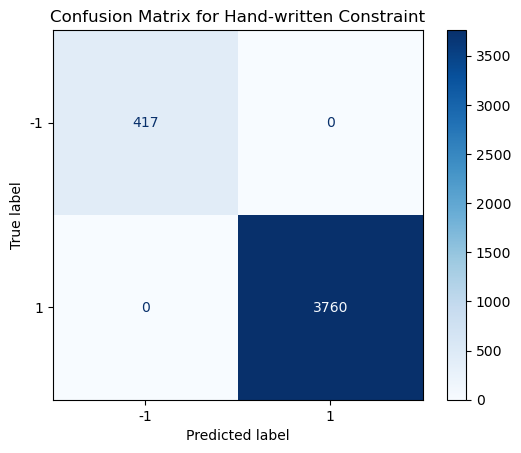

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()